https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

In [1]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [8]:
# generate data

N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N) # loc=Mean, scale= std, size=Output shape
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

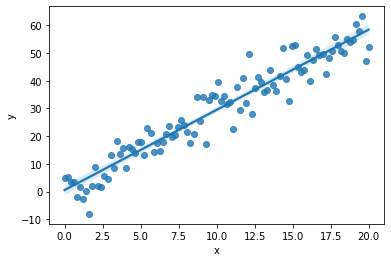

In [9]:
# plot
sns.regplot(df.x, df.y)

In [10]:
# Modeling OLS (ordinary least squares) with Statsmodels

# split features and target
X = df[['constant', 'x']]

# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1117.
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.24e-55
Time:                        09:14:20   Log-Likelihood:                -302.78
No. Observations:                 100   AIC:                             609.6
Df Residuals:                      98   BIC:                             614.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.5515      1.002      0.550      0.583      -1.437       2.540
x              2.8930      0.087     33.421      0.000       2.721       3.065
==============================================================================
Omnibus:                        0.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.177
Skew:                          -0.079   Prob(JB):                        0.915
Kurtosis:                       3.131   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <b> Maximizing LL to solve for Optimal Coefficients

In [11]:
# define likelihood function

def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions
        
    # compute PDF of observed values normally distributed around mean (yhat) with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )  # flip the Bayesian question
    return(negLL)  # return negative LL

In [14]:
# Start with some random coefficient guesses and optimize

guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
options={'disp': True})

Optimization terminated successfully.
         Current function value: 302.781478
         Iterations: 118
         Function evaluations: 203


In [19]:
results

 final_simplex: (array([[0.551557  , 2.89300044, 4.99717907],
       [0.55145983, 2.8930043 , 4.99716897],
       [0.55146683, 2.89300845, 4.99713435],
       [0.55146656, 2.89300662, 4.99725491]]), array([302.78147763, 302.78147763, 302.78147764, 302.78147764]))
           fun: 302.7814776286375
       message: 'Optimization terminated successfully.'
          nfev: 203
           nit: 118
        status: 0
       success: True
             x: array([0.551557  , 2.89300044, 4.99717907])

In [21]:
# drop results into df and round to match statsmodels

resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(), 4)

,coef
constant,0.5516
x,2.8930
sigma,4.9972


    MLE is generalizable for regression and classification!
    MLE is efficient; no consistent estimator has lower asymptotic error than MLE if you’re using the right distribution.

    MLE is a modular way of fitting models by optimizing a probabilistic cost function!

Four major steps in applying MLE:

    Define the likelihood, ensuring using the correct distribution for regression or classification problem.
    Take the natural log and reduce the product function to a sum function.
    Maximize — or minimize the negative of — the objective function.
    Verify that uniform priors are a safe assumption! Otherwise, could attribute the data to a generating function or model of the world that fails the Law of Parsimony.